# import lib

In [19]:
import torch

# 定義訓練數據（輸入及輸出的關係）

In [20]:
# 設定輸入和輸出數據
X = torch.tensor([[-1,-1], [-1,1], [1,-1], [1,1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# 初始化權重、偏差、hyperparameter、threshold

In [21]:
# 初始化權重和偏差
w = torch.tensor([[1.0], [-1.0]], requires_grad=True)
b = torch.tensor([0.0], requires_grad=False)

# 設定超參數
learning_rate = 0.1
threshold = 0

# 定義model

In [22]:
# 定義模型
def model(x):
    y = x @ w + b # Operation, @ is mean "product"
    return y

# 定義Loss function and optimizer

In [23]:
# 定義損失函數和優化器
criterion = torch.nn.MSELoss()
# optimizer = torch.optim.Adam([w, b], lr=learning_rate)
optimizer = torch.optim.SGD([w], lr=learning_rate)

# Train

In [24]:
# 訓練模型
from tqdm import tqdm
epoch_num = 10000
train_step = 1000
loss_ss = [] # 紀錄loss
for epoch in tqdm(range(epoch_num)):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if (epoch+1) % train_step == 0:
        loss_ss.append(loss.item())


100%|██████████| 10000/10000 [00:00<00:00, 13343.08it/s]


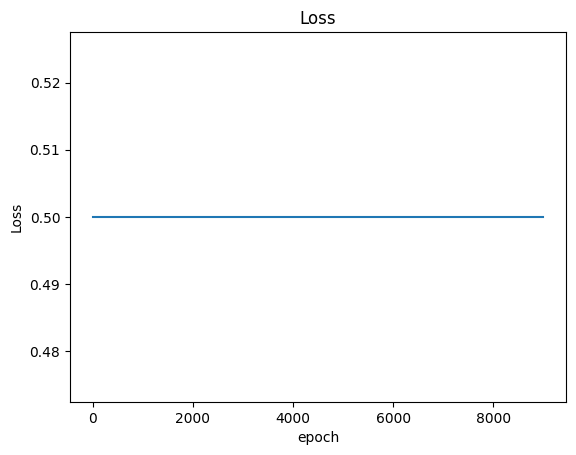

In [25]:
# plot: epoch-loss
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(0, epoch_num, train_step), loss_ss)
ax.set_title("Loss")
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
plt.show()

# Test

In [26]:
# 測試模型
with torch.no_grad():
    outputs = model(X)
    predicted = (outputs > threshold).float()
    print('Predicted:', predicted)

Predicted: tensor([[0.],
        [0.],
        [1.],
        [0.]])


# Show result

In [27]:
import pandas as pd

# 轉換輸入和輸出為Pandas DataFrame
input_df = pd.DataFrame(X.numpy(), columns=['X1', 'X2'])
output_df = pd.DataFrame(predicted.numpy(), columns=['Y'])

# 將輸入和輸出合併成一個表格
result_df = pd.concat([input_df, output_df], axis=1)

print(result_df)


    X1   X2    Y
0 -1.0 -1.0  0.0
1 -1.0  1.0  0.0
2  1.0 -1.0  1.0
3  1.0  1.0  0.0
